# The Structure of Indices of Heart Rate Variability
## Introduction
### Context
The recording of cardiovascular activity with the help of electrocardiographic (ECG) and photoplethysmographic (PPG) signals provides a cost-efficient and reliable window into the autonomic nervous system (ANS). These biosignals provide complex patterns of variability present in any biological systems, i.e. Heart-Rate Variability (HRV). These patterns exhibit the underlying organization of ANS and can be described as mathematical chaos (Shaffer et al. 2015). The aim of this study is to explore the factorial structure of the patterns of HRV.
### Definition
HRV can be defined as the oscillation of the interval between consecutive heartbeats, or inter-beat intervals (IBIs), as regulated by the nervous system. The heart is dually innervated by the two constituents of the autonomic nervous system (ANS) namely, the sympathetic (SNS) and parasympathetic (PNS) nervous system. The ANS dynamically regulates an individual’s heart rate in response to internal, and external events, e.g.  an increase in blood pressure related or not to a stressful event. While the PNS exert more dynamic control over heart rate, the SNS is reported to have more influence on myocardial contractility, meaning they have distinct modes of innervation (Berntson, Quigley, Norman, & Lozano, 2017, p. 189). The PNS changes HR in terms of miliseconds, while the SNS acts on HR in terms of seconds. In this sense, one can suppose that the factorial structure of HRV's indices is informative of autonomic organization.
### Research problem
Although HRV is conceptually simple, the relations between its multiple indices still remain complex to interpret. We use the term indices to describe each variable derived from the IBIs distribution and the  distribution of differences between successive IBIs. The factorial structure of these variables is prone to be altered according to the experimental condition, but also the context, body position, metabolism etc. Significant work has been done to provide a clear methodological framework in response to these issues. Researchers have provided guidelines to validate and share results transparently (Quintana &. Heathers, 2014; Quintana et al. 2016), on top of classic standards (Task Force, 1996), and clear systematic definition of HRV variables (Shaffer et al. 2015). However, Laborde, Mosley & Thayer (2017) argued that some confusion still is present as to the relationship between variables computed from IBIs and their meaning in a given experimental context, i.e. what’s the level of cardiac vagal tone. We aim to respond to this issue by discussing the statistical relationships of these variables independently of experimental context. A principal component analysis (PCA) is used to reduce the dimensionality of our data and isolate factors that could be related to ANS' components contribution. 
## Method
In light of the recommendations published in the last decade, this study explores the statistical relationships between all indices of HRV using open-access databases of annotated ECG signals and NeuroKit data preparation pipeline. In order to allow proper isolation of non-redundant related indices of HRV, PCA will be used as a dimensionality reduction technique to explore their relationships.

#### Dependencies

In [1]:
import pandas as pd
import numpy as np
import neurokit2 as nk

In [2]:
pwd

'/home/francois.lespinasse/git/NeuroKit/studies/hrv_structure'

### Databases
Procedure to dowload the data is available through [...](). Annotated R-peaks are used to compute HRV.

In [3]:
# Load True R-peaks location
files_list = [pd.read_csv("../../data/gudb/Rpeaks.csv"),
             pd.read_csv("../../data/mit_arrhythmia/Rpeaks.csv"),
             pd.read_csv("../../data/mit_normal/Rpeaks.csv"),
             pd.read_csv("../../data/fantasia/Rpeaks.csv")]

### Glasgow University Database

The GUDB Database (Howell & Porr, 2018) contains ECGs from 25 subjects.
Each subject was recorded performing 5 different tasks for two minutes
(sitting, doing a maths test on a tablet, walking on a treadmill,
running on a treadmill, using a hand bike). The sampling rate is 250Hz
for all the conditions.

The script to download and format the database using the
[**ECG-GUDB**](https://github.com/berndporr/ECG-GUDB) Python package by
Bernd Porr can be found
[**here**](https://github.com/neuropsychology/NeuroKit/blob/dev/data/gudb/download_gudb.py).

### MIT-BIH Arrhythmia Database

The MIT-BIH Arrhythmia Database (MIT-Arrhythmia; Moody & Mark, 2001)
contains 48 excerpts of 30-min of two-channel ambulatory ECG recordings
sampled at 360Hz and 25 additional recordings from the same participants
including common but clinically significant arrhythmias (denoted as the
`MIT-Arrhythmia-x` database).

The script to download and format the database using the can be found
[**here**](https://github.com/neuropsychology/NeuroKit/blob/dev/data/mit_arrhythmia/download_mit_arrhythmia.py).

<!-- ### MIT-BIH Noise Stress Test Database -->

<!-- The MIT-BIH Noise Stress Test Database [MIT-NST; @moody1984bih] features two 30-minute recordings distorted by adding different types and levels of synthesized noise typical of electrode motion artefacts. -->

### MIT-BIH Normal Sinus Rhythm Database

This database includes 18 clean long-term ECG recordings of subjects.
Due to memory limits, we only kept the second hour of recording of each
participant.

The script to download and format the database using the can be found
[**here**](https://github.com/neuropsychology/NeuroKit/blob/dev/data/mit_normal/download_mit_normal.py).

### Lobachevsky University Electrocardiography Database

The Lobachevsky University Electrocardiography Database (LUDB;
Kalyakulina et al., 2018) consists of 200 10-second 12-lead ECG signal
records representing different morphologies of the ECG signal. The ECGs
were collected from healthy volunteers and patients, which had various
cardiovascular diseases. The boundaries of P, T waves and QRS complexes
were manually annotated by cardiologists for all 200 records.

### Fantasia Database

The Fantasia database (Iyengar, Peng, Morin, Goldberger, & Lipsitz,
1996) consists of twenty young and twenty elderly healthy subjects. All
subjects remained in a resting state in sinus rhythm while watching the
movie Fantasia (Disney, 1940) to help maintain wakefulness. The
continuous ECG signals were digitized at 250 Hz. Each heartbeat was
annotated using an automated arrhythmia detection algorithm, and each
beat annotation was verified by visual inspection.


## Procedure

### NeuroKit Data preparation

In [4]:
# Get results
all_results = pd.DataFrame()

# Get to a participant's file inside a given database
for file in files_list:
    for database in np.unique(file["Database"]):
        data = file[file["Database"] == database]
        
        # Get sample rate and millisecond interval for each participant 
        for participant in np.unique(data["Participant"]):
            data_participant = data[data["Participant"] == participant]
            sampling_rate = np.unique(data_participant["Sampling_Rate"])[0]
            rpeaks = data_participant["Rpeaks"].values
            
            # Compute HRV indices of a given participant
            results = nk.hrv(rpeaks, sampling_rate=sampling_rate)
            results["Participant"] = participant
            results["Database"] = database
            results["Recording_Length"] = rpeaks[-1] / sampling_rate / 60
            
            # keep results
            all_results = pd.concat([all_results, results], axis=0)

# push results in csv format
all_results.to_csv("data.csv", index=False)

### Time
Contains time domain HRV metrics:
   - **RMSSD**: The square root of the mean of the sum of successive differences between
        adjacent RR intervals. It is equivalent (although on another scale) to SD1, and
        therefore it is redundant to report correlations with both (Ciccone, 2017).
   - **MeanNN**: The mean of the RR intervals.
   - **SDNN**: The standard deviation of the RR intervals.
   - **SDSD**: The standard deviation of the successive differences between RR intervals.
   - **CVNN**: The standard deviation of the RR intervals (SDNN) divided by the mean of the RR
        intervals (MeanNN).
   - **CVSD**: The root mean square of the sum of successive differences (RMSSD) divided by the
        mean of the RR intervals (MeanNN).
   - **MedianNN**: The median of the absolute values of the successive differences between RR intervals.
   - **MadNN**: The median absolute deviation of the RR intervals.
   - **HCVNN**: The median absolute deviation of the RR intervals (MadNN) divided by the median
        of the absolute differences of their successive differences (MedianNN).
   - **IQRNN**: The interquartile range (IQR) of the RR intervals.
   - **pNN50**: The proportion of RR intervals greater than 50ms, out of the total number of RR intervals.
   - **pNN20**: The proportion of RR intervals greater than 20ms, out of the total number of RR intervals.
   - **TINN**: A geometrical parameter of the HRV, or more specifically, the baseline width of
        the RR intervals distribution obtained by triangular interpolation, where the error of least
        squares determines the triangle. It is an approximation of the RR interval distribution.
   - **HTI**: The HRV triangular index, measuring the total number of RR intervals divded by the
        height of the RR intervals histogram.

### Frequency
   - **ULF**: The spectral power density pertaining to ultra low frequency band i.e., .0 to .0033 Hz
        by default.
   - **VLF**: The spectral power density pertaining to very low frequency band i.e., .0033 to .04 Hz
        by default.
   - **LF**: The spectral power density pertaining to low frequency band i.e., .04 to .15 Hz by default.
   - **HF**: The spectral power density pertaining to high frequency band i.e., .15 to .4 Hz by default.
   - **VHF**: The variability, or signal power, in very high frequency i.e., .4 to .5 Hz by default.
   - **LFn**: The normalized low frequency, obtained by dividing the low frequency power by
        the total power.
   - **HFn**: The normalized high frequency, obtained by dividing the low frequency power by
        the total power.
   - **LnHF**: The log transformed HF.

### Non-Linear
   - **SD1**: SD1 is a measure of the spread of RR intervals on the Poincaré plotperpendicular to the line of identity. It is an index of short-term RR interval fluctuations, i.e., beat-to-beat variability. It is equivalent (although on another scale) to RMSSD, and therefore it is redundant to report correlations with both (Ciccone, 2017).

   - **SD2**: SD2 is a measure of the spread of RR intervals on the Poincaré plot along the line of identity. It is an index of long-term RR interval fluctuations.

   - **SD1SD2**: the ratio between short and long term fluctuations of the RR intervals (SD1 divided by SD2).

   - **S**: Area of ellipse described by SD1 and SD2 (``pi * SD1 * SD2``). It is proportional to *SD1SD2*.

   - **CSI**: The Cardiac Sympathetic Index (Toichi, 1997), calculated by dividing the longitudinal variability of the Poincaré plot (``4*SD2``) by its transverse variability (``4*SD1``).

   - **CVI**: The Cardiac Vagal Index (Toichi, 1997), equal to the logarithm of the product of longitudinal (``4*SD2``) and transverse variability (``4*SD1``).

   - **CSI_Modified**: The modified CSI (Jeppesen, 2014) obtained by dividing the square of the longitudinal variability by its transverse variability.

**Indices of Heart Rate Asymmetry (HRA), i.e., asymmetry of the Poincaré plot** (Yan, 2017):

   - **GI**: Guzik's Index, defined as the distance of points above line of identity (LI) to LI divided by the distance of all points in Poincaré plot to LI except those that are located on LI.

   - **SI**: Slope Index, defined as the phase angle of points above LI divided by the phase angle of all points in Poincaré plot except those that are located on LI.

   - **AI**: Area Index, defined as the cumulative area of the sectors corresponding to the points that are located above LI divided by the cumulative area of sectors corresponding to all points in the Poincaré plot except those that are located on LI.

   - **PI**: Porta's Index, defined as the number of points below LI divided by the total number of points in Poincaré plot except those that are located on LI.

   - **SD1d** and **SD1a**: short-term variance of contributions of decelerations (prolongations of RR intervals) and accelerations (shortenings of RR intervals), respectively (Piskorski,  2011).

   - **C1d** and **C1a**: the contributions of heart rate decelerations and accelerations to short-term HRV, respectively (Piskorski,  2011).

   - **SD2d** and **SD2a**: long-term variance of contributions of decelerations (prolongations of RR intervals) and accelerations (shortenings of RR intervals), respectively (Piskorski,  2011).

   - **C2d** and **C2a**: the contributions of heart rate decelerations and accelerations to long-term HRV, respectively (Piskorski,  2011).

   - **SDNNd** and **SDNNa**: total variance of contributions of decelerations(prolongations of RR intervals) and accelerations (shortenings of RR intervals), respectively (Piskorski,  2011).

   - **Cd** and **Ca**: the total contributions of heart rate decelerations and  accelerations to HRV.

**Indices of Heart Rate Fragmentation** (Costa, 2017):

   - **PIP**: Percentage of inflection points of the RR intervals series.

   - **IALS**: Inverse of the average length of the acceleration/deceleration segments.

   - **PSS**: Percentage of short segments.

   - **PAS**: IPercentage of NN intervals in alternation segments.

**Indices of Complexity**:

   - **ApEn**: The approximate entropy measure of HRV, calculated by `entropy_approximate()`.

   - **SampEn**: The sample entropy measure of HRV, calculated by `entropy_sample()`

In [5]:
all_results

,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_pNN50,...,HRV_SD1,HRV_SD2,HRV_SD2SD1,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_SampEn,Participant,Database,Recording_Length
0,23.171524,683.862857,30.414446,23.219165,0.044474,0.033883,680.0,23.7216,0.034885,2.285714,...,16.418429,39.755657,2.421404,2.421404,4.018851,385.058105,1.653890,GUDB_00,GUDB (hand_bike),1.996733
0,38.583154,610.687179,36.684214,38.681192,0.060070,0.063180,608.0,35.5824,0.058524,4.102564,...,27.351733,44.083396,1.611722,1.611722,4.285380,284.200751,1.553586,GUDB_01,GUDB (hand_bike),1.993667
0,26.103756,721.662651,43.727331,26.169384,0.060592,0.036172,716.0,41.5128,0.057979,6.626506,...,18.504549,59.006276,3.188744,3.188744,4.242297,752.623710,1.244324,GUDB_03,GUDB (hand_bike),1.998200
0,17.440450,627.494737,47.168251,17.453252,0.075169,0.027794,616.0,23.7216,0.038509,2.105263,...,12.341313,65.554403,5.311785,5.311785,4.112083,1392.843632,0.878910,GUDB_04,GUDB (hand_bike),1.992333
0,22.499009,641.612903,57.337509,22.560054,0.089365,0.035066,638.0,68.1996,0.106896,4.301075,...,15.952367,79.502841,4.983764,4.983764,4.307328,1584.893724,1.064323,GUDB_05,GUDB (hand_bike),1.999667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,33.627883,1025.523529,74.048763,33.630353,0.072206,0.032791,1020.0,71.1648,0.069769,12.264706,...,23.780251,101.984991,4.288642,4.288642,4.588873,1749.508609,1.368850,Fantasia_f2y06,Fantasia,117.017467
0,99.430597,1080.676904,107.875572,99.438310,0.099822,0.092008,1080.0,94.8864,0.087858,53.327129,...,70.313503,135.389399,1.925511,1.925511,5.182743,1042.774915,1.647632,Fantasia_f2y07,Fantasia,116.928600
0,124.451864,989.419373,114.683512,124.460427,0.115910,0.125783,984.0,94.8864,0.096429,63.924051,...,88.006812,136.232951,1.547982,1.547982,5.282918,843.544567,1.682562,Fantasia_f2y08,Fantasia,120.647533
0,292.589225,878.707338,217.830282,292.607151,0.247899,0.332977,828.0,77.0952,0.093110,34.043856,...,206.904501,228.233633,1.103087,1.103087,5.878270,1007.046076,0.776314,Fantasia_f2y09,Fantasia,120.146867


In [11]:
import pingouin as pg
import seaborn as sns

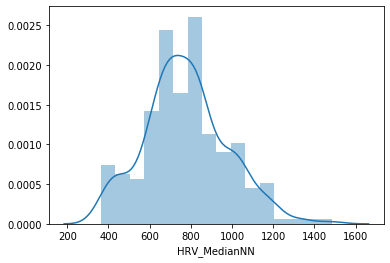

In [15]:
sns.distplot(all_results['HRV_MedianNN'])

In [33]:
corr = pg.pairwise_corr(all_results, method='pearson', tail='two-sided', padjust='bonf')

In [34]:
corr.loc[corr['r2']> 0.95]

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,p-corr,p-adjust,BF10,power
1,HRV_RMSSD,HRV_SDNN,pearson,two-sided,252,0.980887,"[0.98, 0.99]",0.962139,0.961835,2.320457,9.667262e-180,4.205259e-177,bonf,nan,1.0
2,HRV_RMSSD,HRV_SDSD,pearson,two-sided,252,1.000000,"[1.0, 1.0]",1.000000,1.000000,8.751906,0.000000e+00,0.000000e+00,bonf,nan,1.0
4,HRV_RMSSD,HRV_CVSD,pearson,two-sided,252,0.990833,"[0.99, 0.99]",0.981749,0.981603,2.690334,2.322085e-219,1.010107e-216,bonf,nan,1.0
21,HRV_RMSSD,HRV_SD1,pearson,two-sided,252,1.000000,"[1.0, 1.0]",1.000000,1.000000,8.751906,0.000000e+00,0.000000e+00,bonf,nan,1.0
33,HRV_MeanNN,HRV_MedianNN,pearson,two-sided,252,0.987594,"[0.98, 0.99]",0.975342,0.975144,2.538260,5.031872e-203,2.188864e-200,bonf,nan,1.0
57,HRV_SDNN,HRV_SDSD,pearson,two-sided,252,0.980882,"[0.98, 0.99]",0.962130,0.961826,2.320342,9.944066e-180,4.325669e-177,bonf,nan,1.0
58,HRV_SDNN,HRV_CVNN,pearson,two-sided,252,0.984417,"[0.98, 0.99]",0.969076,0.968828,2.423439,9.907246e-191,4.309652e-188,bonf,nan,1.0
76,HRV_SDNN,HRV_SD1,pearson,two-sided,252,0.980882,"[0.98, 0.99]",0.962130,0.961826,2.320342,9.944066e-180,4.325669e-177,bonf,nan,1.0
77,HRV_SDNN,HRV_SD2,pearson,two-sided,252,0.991358,"[0.99, 0.99]",0.982791,0.982653,2.719988,1.495032e-222,6.503390e-220,bonf,nan,1.0
85,HRV_SDSD,HRV_CVSD,pearson,two-sided,252,0.990831,"[0.99, 0.99]",0.981746,0.981599,2.690229,2.383282e-219,1.036728e-216,bonf,nan,1.0


In [35]:
corr.loc[corr['r2']< -0.95]

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,p-corr,p-adjust,BF10,power


# References
Ali, S. S., Lifshitz, M., & Raz, A. (2014). Empirical neuroenchantment: from reading minds to thinking critically. Frontiers in human neuroscience, 8, 357. https://doi.org/10.3389/fnhum.2014.00357